#  <font color=red>Linear Regression using Boston housing data Set</font>

#### Objective: -  _"<font color = green> To Implement Linear regression using Boston housing data set </font> "_

-  <font color=violet>Importing Data set and Libraries</font>

In [1]:
from keras.datasets import boston_housing
import numpy as np
(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()


65536/57026 [==================================] - 0s 0us/step


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [4]:
train_targets.shape

(404,)

In [5]:
test_targets.shape

(102,)

In [6]:
train_targets[0],train_targets[3]

(15.2, 21.1)

In [7]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline


# The dataset contains the following details

# # Features are 
# CRIM: Per capita crime rate by town
# ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
# INDUS: Proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: Nitric oxide concentration (parts per 10 million)
# RM: Average number of rooms per dwelling
# AGE: Proportion of owner-occupied units built prior to 1940
# DIS: Weighted distances to five Boston employment centers
# RAD: Index of accessibility to radial highways
# TAX: Full-value property tax rate per $10,000
# PTRATIO: Pupil-teacher ratio by town
# B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
# LSTAT: Percentage of lower status of the population

# #Target Value
# MEDV: Median value of owner-occupied homes in $1000s


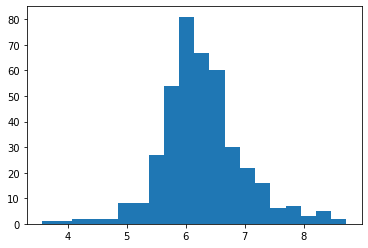

In [9]:
import matplotlib.pyplot as plt
(n,bins,patch)=plt.hist(train_data[:,5],bins=20) # Histogram plot of the average number of rooms per dwelling

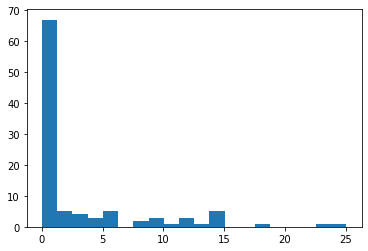

In [10]:
import matplotlib.pyplot as plt
(n,bins,patch)=plt.hist(test_data[:,0],bins=20) # Histogram plot of the crime rate by town

### Linear Regression
### price = a_0 + a_1*feature_1 + a_2*feature_2 + ... + a_13*feature_13
#### Y, H , a . Using Closed form solution

In [11]:
Y= train_targets

In [12]:
print(Y.shape)
A_0 = np.ones((404,1))
mu = np.mean(train_data, axis = 0) #standardising the training data by subtracting the mean and dividing the std
std = np.std(train_data, axis = 0)
X_norm = (train_data - mu) / std
print(X_norm.shape)


(404,)
(404, 13)


In [13]:
X = X_norm
#H= ha
H = np.hstack((A_0,X))
print(H.shape)
a = np.dot((np.linalg.inv(np.dot(H.T,H))),np.dot(H.T,Y)) #Formula usage in code!!

(404, 14)


In [14]:
a

array([22.3950495 , -1.10749194,  1.35308963,  0.02710126,  0.9943535 ,
       -2.40156557,  2.3962877 ,  0.2111952 , -3.47121628,  2.90814885,
       -1.95741889, -1.98298545,  0.81955092, -4.02739073])

In [15]:
a.shape

(14,)

In [28]:
import time
mu = np.mean(test_data, axis = 0) #standardising the test data by subtracting the mean and dividing the std
std = np.std(test_data, axis = 0)
T_norm = (test_data - mu) / std
start = time.time()
H_test = np. append(np.ones([102,1]),T_norm,axis = 1) 
p = np.round_(np.dot(H_test,a),decimals=2)
end = time.time()
MSE = (np.square(p - test_targets)).mean()
print(MSE)
print(f"Time take : {end - start}")

20.984566666666666
Time take : 0.001049041748046875


## ---------------------------------------------------------
## <font color=amber>_"Gradient Descent Method"_</font>

#### J = (1/m)(Y - Ha)**2

###### a = a- learningrate* change(J)

In [17]:
(train_data, train_targets), (test_data,test_targets) = boston_housing.load_data() #Loading data again
train_targets.shape

(404,)

In [18]:
mu = np.mean(train_data, axis = 0) #standardising the training data by subtracting the mean and dividing the std
std = np.std(train_data, axis = 0)
X_norm = (train_data - mu) / std
print(X_norm.shape)


(404, 13)


In [19]:
X = X_norm
y_true = train_targets

In [20]:
# weights = np.ones(X.shape[1])
weights = np.random.rand(X.shape[1])
b = 0
no_of_sam = X.shape[0]
epochs = 2500
alpha = 0.01
cost_list = []
epoch_list = []

In [29]:
start = time.time()
for i in range(epochs):        
    y_predicted = np.dot(weights, X.T) + b
    w_grad = -(2/no_of_sam)*(X.T.dot(y_true-y_predicted))
    b_grad = -(2/no_of_sam)*np.sum(y_true-y_predicted)
    weights = weights - alpha * w_grad
    b = b - alpha * b_grad
    mse = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
    if i%5==0:
        cost_list.append(mse)
        epoch_list.append(i)
end = time.time()
print(f"Time take : {end - start}")

Time take : 0.1409165859222412


In [22]:
b,weights,mse

(22.395049504950425,
 array([-1.10110396,  1.3387885 , -0.00869329,  1.00048288, -2.3997313 ,
         2.40438094,  0.20027226, -3.47907146,  2.79035176, -1.8263816 ,
        -1.97903546,  0.81788971, -4.02220734]),
 22.006732584970848)

In [23]:
weights.shape

(13,)

In [24]:
mu = np.mean(test_data, axis = 0) #standardising the training data by subtracting the mean and dividing the std
std = np.std(test_data, axis = 0)
Test_norm = (test_data - mu) / std
test_mse = np.mean(np.square(test_targets-(np.dot(weights, Test_norm.T) + b)))
test_mse

20.953103731320876

In [25]:
a,MSE

(array([22.3950495 , -1.10749194,  1.35308963,  0.02710126,  0.9943535 ,
        -2.40156557,  2.3962877 ,  0.2111952 , -3.47121628,  2.90814885,
        -1.95741889, -1.98298545,  0.81955092, -4.02739073]),
 20.984566666666666)

In [26]:
print(MSE - test_mse) #Overall error from both the methods

0.03146293534578959


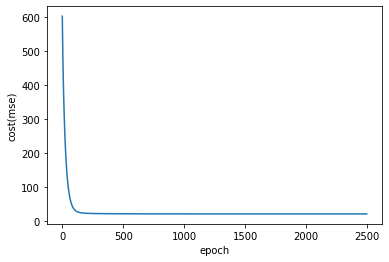

In [27]:
plt.xlabel("epoch")
plt.ylabel("cost(mse)")
plt.plot(epoch_list,cost_list)
plt.show()